# Analyzing Stock Market Data to Build a Portfolio

## Project Goal

### Analyze share price data from various listings to answer the following questions:

1. What kind of Growth % do we expect from the various listings? <br>
2. How do the Growth % of the different listings correlate to each other? <br>
3. What is the estimated listing share price at a future date (prediction)? <br>
4. What kind of volatility do the listings have? <br>
5. How can we use our analysis to form a balanced investment portfolio? <br>

### Overall Methodology:

1. Import and organize data for the various listings <br>
2. Make observations about the data <br>
3. Use these observations to answer the questions <br>

## References

Share price information obtained from: [Yahoo Finance](https://finance.yahoo.com/) <br>
Yahoo Finance library: [yfinance](https://pypi.org/project/yfinance/) <br>

## Inputs

### Below are the inputs to perform the analysis

In [ ]:
s_list='AM AAPL FB NVDA MSFT PYPL TSLA ZNGA'  # List of "listings" to be analyzed
total_investment=7001  # Total investment value in USD
sample_interval ='1d'  # Time interval to fetch data at
start='01/11/2020'  # Start date of interest
end='12/11/2020'  # End date of interest
datetime_query=['12/28/2020'] # Datetime query values (for prediction)
pricetype='Close' # Open, Close, Low, High

## Import Libraries

In [2]:
# Python Version
import sys
sys.version

'3.6.11 | packaged by conda-forge | (default, Nov 27 2020, 18:57:37) \n[GCC 9.3.0]'

In [3]:
#Update python standard libraries install
!pip install --upgrade pip

# library to for array handling
import numpy as np 

# library for dataframes
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Linear Model
import sklearn as sk

# List Functions module
!pip install listfun
from listfun import Listoper as lst

# Math Module
import math

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# Machine-Learning and analysis modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

! pip install expsolver;
from expsolver import Solver as solve

# Module to handle XML and HTML 
! pip install lxml;

#Finance information import (Link in "Yahoo Finance" Markdown Cell in the "References" Section)
!pip install yfinance;
import yfinance as yf;

print('Libraries imported.')

Libraries imported.


## Import Data into DataFrame

In [4]:
end=pd.to_datetime(end)
#start=end-pd.to_timedelta(start)
start=pd.to_datetime(start)
print('Start: {}, End: {}'.format(start,end))

Start: 2020-01-11 00:00:00, End: 2020-12-11 00:00:00


### Create basic dataframe "df_info" containing all the available stocks information

In [5]:
# Create list of stock names as specified by the User
s_list=s_list.split(' ')

In [6]:
# Initialize Basic Dataframe as empty
df_info=pd.DataFrame() 

# Add Shares information for List of stock names
for item in s_list:
    data=yf.Ticker(item)
    df_data=data.history(period=sample_interval,start=start ,end=end )
    df_data=df_data.reset_index()
    df_data['Name']=pd.DataFrame([item for i in range(0,len(df_data))])
    df_info=pd.concat([df_info,df_data])
    

# Display basic information
df_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
0,2020-01-13,5.610938,5.793990,5.511453,5.722361,2873200,0.0,0.0,AM
1,2020-01-14,5.722360,5.921329,5.650731,5.897453,2279600,0.0,0.0,AM
2,2020-01-15,5.889495,6.048670,5.855272,6.040711,3513900,0.0,0.0,AM
3,2020-01-16,6.056629,6.263557,5.992959,6.024794,4626500,0.0,0.0,AM
4,2020-01-17,6.072547,6.104382,5.754196,5.762154,7330800,0.0,0.0,AM


In [7]:
# Size of Data:
print('Size of the full dataset is: {} by {}'.format(df_info.shape[0],df_info.shape[1]))

Size of the full dataset is: 1856 by 9


## Exploratory Pre-Processing Analysis

### Create Dataframe (df) of Relevant share Price vs. date, which will be the data looked at in this analysis  

In [8]:
# Create new Dataframe of relevant Share Prices
datevalues=df_info['Date'].sort_values().drop_duplicates().tolist()
df=pd.DataFrame(index=datevalues,columns=s_list)
for item in s_list:
    df_item=df_info[df_info['Name']==item]
    for ind in df.index.tolist():
    #df[['Date',item]]=df_info.loc[df_info['Name']==item,['Date',pricetype]]
        try:
            df.loc[ind,item]=df_item.loc[df_item['Date']==ind,pricetype].values[0]
        except:
            pass
    df[item].fillna(method='bfill',inplace=True)

df_price=df
# Display initial few contents of the Dataset
df.head(10)

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA
2020-01-13,5.722361,77.923538,221.910004,251.564880,161.568405,115.279999,104.972000,6.77
2020-01-14,5.897453,76.871323,219.059998,246.872635,160.430450,114.639999,107.584000,6.77
2020-01-15,6.040711,76.541885,221.149994,245.165436,161.469452,114.849998,103.699997,6.85
2020-01-16,6.024794,77.500694,221.770004,248.519913,164.428116,115.400002,102.697998,6.81
2020-01-17,5.762154,78.358696,222.139999,248.869354,165.348358,116.040001,102.099998,6.67
2020-01-21,5.388092,77.827667,221.440002,247.531555,164.754654,116.150002,109.440002,6.63
2020-01-22,5.228917,78.105476,221.320007,249.697983,163.963043,115.500000,113.912003,6.52
2020-01-23,5.189122,78.481621,219.759995,252.443451,164.972351,117.889999,114.440002,6.39
2020-01-24,4.926483,78.255440,217.940002,250.067352,163.309952,116.980003,112.963997,6.10
2020-01-27,4.902606,75.954315,214.869995,239.804306,160.578888,115.239998,111.603996,5.93


### Display basic information about this dataset

In [9]:
# Display basic statistics of the opening prices
# Darker cells denote higher values
df.describe().style.background_gradient(axis=1).format("{:.2f}")

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA
count,232.00,232.00,232.00,232.00,232.00,232.00,232.00,232.00
mean,4.88,93.35,232.85,392.18,191.41,158.79,273.86,8.26
std,1.45,21.12,38.92,115.09,22.63,39.02,146.80,1.21
min,1.67,55.29,146.01,196.19,134.37,85.26,72.24,5.87
25%,3.94,76.65,209.76,279.44,173.21,117.70,150.56,7.09
50%,5.09,90.71,235.22,379.53,199.72,171.19,203.44,8.39
75%,5.96,114.84,265.98,510.62,210.52,192.77,414.26,9.31
max,8.43,133.95,303.91,582.31,231.05,217.93,649.88,10.44


### Create basic Time plot to look at pertinent information

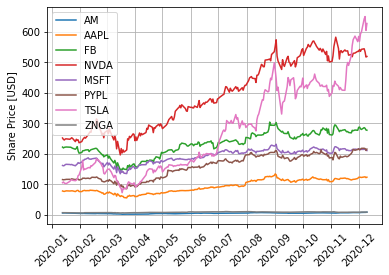

In [10]:
# Plot Open price vs. Time
ax= plt.subplot()
for item in df_price.columns:
    plt.plot(df_price[item])

plt.xticks(rotation=45)
ax.legend(df_price.columns)
plt.ylabel('Share Price [USD]')
ax.grid(True)

## What kind of Growth % do we see with the various listings?

### Normalize the opening price to determine Growth % over the period of interest

Normalize w.r.t. start price (df_start) <br> 
Normalization used: (price-start_price)/start_price*100 to obtain df_norm

In [11]:
# Normalization Function
def df_normalize(df):
    df_strt=df.iloc[0,:]
    df_norm=(df.iloc[:,:]-df_strt)/df_strt*100
    df_strt=pd.DataFrame(df_strt).transpose()
    df_strt.set_axis(['start_price'],axis=0,inplace=True)
    return [df_norm,df_strt]

# Store Normalized values in DataFrame and display results                          
[df_norm,df_start]=df_normalize(df)
df_norm.head()

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA
2020-01-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-14,3.059790,-1.350318,-1.284307,-1.865223,-0.704318,-0.555169,2.488282,0.000000
2020-01-15,5.563277,-1.773088,-0.342486,-2.543855,-0.061245,-0.373005,-1.211755,1.181683
2020-01-16,5.285109,-0.542640,-0.063088,-1.210410,1.769969,0.104097,-2.166294,0.590841
2020-01-17,0.695403,0.558442,0.103644,-1.071503,2.339537,0.659266,-2.735969,-1.477103


In [12]:
df_start

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA
start_price,5.722361,77.923538,221.910004,251.56488,161.568405,115.279999,104.972,6.77


In [13]:
# Size of Data:
print('Size of the data is: {} by {}'.format(df_norm.shape[0],df_norm.shape[1]))

Size of the data is: 232 by 8


In [14]:
# Display basic statistics of the normalized prices
# Darker cells denote higher values
df_norm.describe().loc[['count','mean','min','max'],:].style.background_gradient(axis=1).format("{:.1f}")

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA
count,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0
mean,-14.7,19.8,4.9,55.9,18.5,37.7,160.9,22.0
min,-70.9,-29.0,-34.2,-22.0,-16.8,-26.0,-31.2,-13.3
max,47.3,71.9,37.0,131.5,43.0,89.0,519.1,54.2


### Plot trends in Normalized values

Time Plot

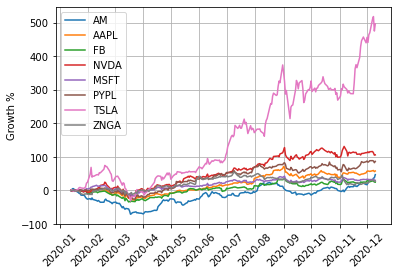

In [15]:
# Display Growth % over time
ax= plt.subplot()
for item in df_norm.columns:
    plt.plot(df_norm[item])

plt.xticks(rotation=45)
ax.legend(df.columns)
plt.ylabel('Growth %')
ax.grid(True)

## How do the price gains of the listings correlate to each other?

Correlation Matrix

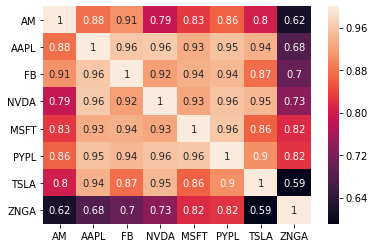

In [16]:
sns.heatmap(df_norm.corr(),annot=True);

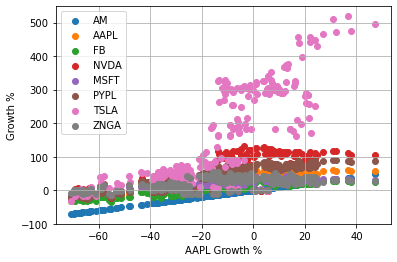

In [17]:
ax= plt.subplot()
for item in df_norm.columns:
    plt.scatter(df_norm.iloc[:,0],df_norm[item])

ax.legend(df_norm.columns)
plt.xlabel('AAPL Growth %')
plt.ylabel('Growth %')
ax.grid(True)

## Calculate percent and absolute estimate and bounds of Growth 

### Create a linear regression fit for the data with thrice the standard dev. of obs.-est. to determine the boundaries

<b> Linear Regression object, score and price boundaries for each listing </b>

In [18]:
def lin_obj(df):
    df_lin=df.iloc[0:1,:]
    df_lin.reindex(['fit_obj','score','bound'])
    df_lin.drop(index=df_lin.index[0],inplace=True)
    for item in df_lin.columns:
        # Implement train-test split thrice and fit the data to the average fit ...
        # ... (intercept and coeff.) of the three splits
        X=np.array(pd.to_numeric(df.index)).reshape(-1, 1)
        Y=(df[item].values).reshape(-1, 1)
        lin_list_coeff=[]
        lin_list_intercept=[]
        for i in range(0,1):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0)
            lin_obj=LinearRegression()
            lin_obj.fit(X_train,y_train)
            lin_list_coeff.append(lin_obj.coef_)
            lin_list_intercept.append(lin_obj.intercept_)
        linobj = LinearRegression()
        linobj.coef_=np.array(np.array(lin_list_coeff).mean()).reshape(-1)
        linobj.intercept_=np.array(np.array(lin_list_intercept).mean()).reshape(-1)
        score=linobj.score(X,Y)
        df_lin.loc['fit_obj',item]=linobj
        df_lin.loc['score',item]=score

    # Calculate price bounds
    df_est=pd.DataFrame()
    df_est.rename_axis(index='Datetime')
    df_est['Datetime']=df.index
    df_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_lin.loc['fit_obj',item]
        for datetime in df_est.index:
            est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            df_est.loc[datetime,'{}'.format(item)]=est
    for item in df.columns:
        df_diff=df[item]-df_est[item]
        bounds=3*df_diff.std()
        df_lin.loc['bound',item]=bounds
        
    return df_lin

Convert rise and fall from % to price (using price change= percent change/100*start price) and display.<br>

In [19]:
# Call lin_obj(...) to create the price estimation object dataframe
df_price_est_obj=lin_obj(df_norm)
df_price_bounds_dict={}
for item in df_norm.columns:
    df_price_bounds_dict[item]=df_price_est_obj.loc['bound',item]*df_start.loc['start_price',item]/100
df_price_bounds=pd.DataFrame(df_price_bounds_dict,index=['price_bounds'])
df_price_est_obj=df_price_est_obj.append(df_price_bounds)
df_price_est_obj

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA
fit_obj,"LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr..."
score,0.525662,0.795724,0.692342,0.921532,0.736462,0.843285,0.868866,0.507139
bound,52.534,36.7555,29.1878,38.4453,21.5671,40.1935,151.924,37.7254
price_bounds,3.00619,28.6412,64.7707,96.7149,34.8456,46.3351,159.477,2.55401


### Estimate the price and bounds vs. date using the fit object

In [20]:
# Function to estimate the price given the price dataframe, fit objects and datetime query
def price_est(df,df_price_est_obj,df_strt,datetime_query):
    df_price_est=pd.DataFrame()
    df_price_est.rename_axis(index='Datetime')
    df_price_est['Datetime']=pd.to_datetime(datetime_query)
    df_price_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_price_est_obj.loc['fit_obj',item]
        for datetime in df_price_est.index:
            norm_price_est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            price_est=norm_price_est*df_strt.loc['start_price',item]/100+df_strt.loc['start_price',item]
            df_price_est.loc[datetime,'{}'.format(item)]=price_est
            df_price_est.loc[datetime,'{}_low'.format(item)]=price_est-(df_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_high'.format(item)]=price_est+(df_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_lo_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_low'.format(item)]].mean()
            df_price_est.loc[datetime,'{}_hi_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_high'.format(item)]].mean()
    df_price_est.reindex(df_price_est.index.date)
    df_price_est=df_price_est
    return df_price_est


## What is the predicted share price?

In [21]:
df_price_est=price_est(df,df_price_est_obj,df_start,datetime_query)
df_price_est.head().style.background_gradient(axis=1).format("{:.0f}")

,AM,AM_low,AM_high,AM_lo_mid,AM_hi_mid,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,ZNGA,ZNGA_low,ZNGA_high,ZNGA_lo_mid,ZNGA_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-28 00:00:00,7,4,10,5,8,129,101,158,115,143,294,230,359,262,327,602,505,699,554,651,228,193,263,211,246,227,181,273,204,250,534,375,693,454,614,10,7,12,9,11


## What kind of volatility do the listings have?

## How do we generate our investment portfolio?

### Estimate the price history along with the bounds and plot the history and estimates for each listing

In [22]:
# Datetime history query values
datetime_query_start_end=pd.date_range(start=start,end=end)

In [23]:
# Generate and display estimates (listing, listing_low, listing_high)
df_price_est_start_end=price_est(df,df_price_est_obj,df_start,datetime_query_start_end)
df_price_est_start_end.head().style.format("{:.0f}")

,AM,AM_low,AM_high,AM_lo_mid,AM_hi_mid,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,ZNGA,ZNGA_low,ZNGA_high,ZNGA_lo_mid,ZNGA_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-11 00:00:00,3,0,6,2,5,60,32,89,46,75,176,112,241,144,209,199,103,296,151,248,158,123,192,140,175,96,50,143,73,119,35,-125,194,-45,115,7,4,9,5,8
2020-01-12 00:00:00,3,0,6,2,5,61,32,89,46,75,177,112,241,144,209,200,104,297,152,249,158,123,193,140,175,97,50,143,73,120,36,-123,196,-43,116,7,4,9,5,8
2020-01-13 00:00:00,3,0,6,2,5,61,32,89,47,75,177,112,242,145,209,202,105,298,153,250,158,123,193,140,175,97,51,143,74,120,38,-122,197,-42,117,7,4,9,5,8
2020-01-14 00:00:00,3,0,6,2,5,61,32,90,47,75,177,113,242,145,210,203,106,299,154,251,158,123,193,141,176,97,51,144,74,121,39,-120,199,-41,119,7,4,9,6,8
2020-01-15 00:00:00,3,0,6,2,5,61,33,90,47,76,178,113,242,145,210,204,107,301,155,252,158,123,193,141,176,98,51,144,75,121,41,-119,200,-39,120,7,4,9,6,8


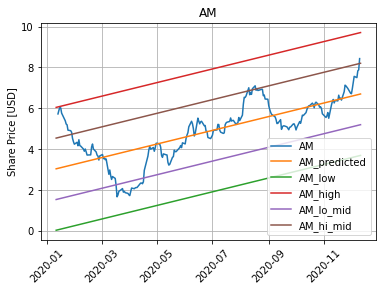

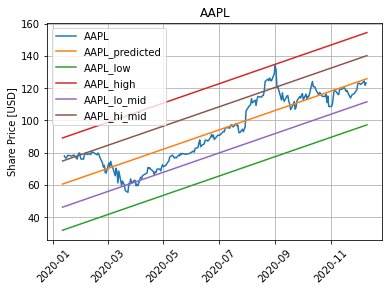

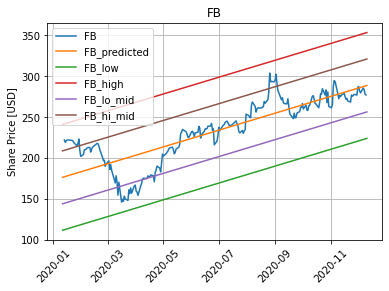

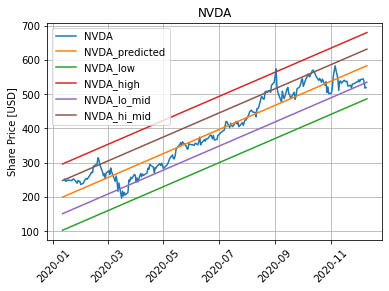

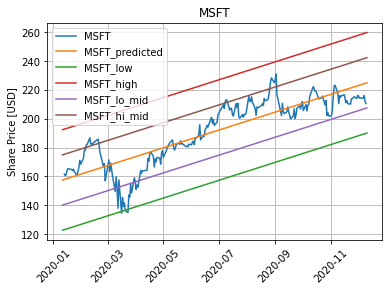

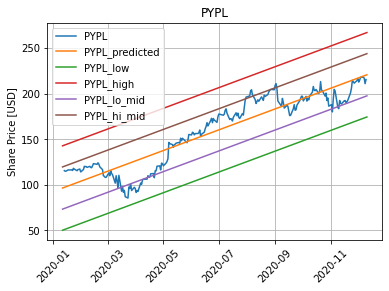

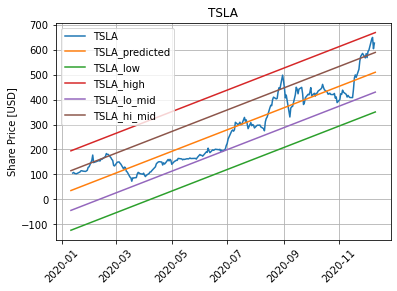

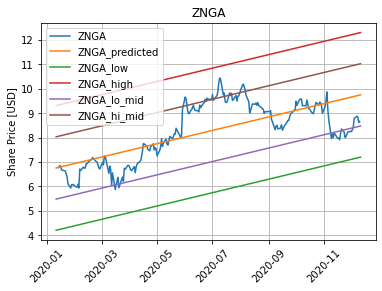

In [24]:
# Plot Open price vs. Time
num_plot=len(df.columns)
i=1
for item in df.columns:
    plt.figure()
    plt.plot(df_price[item])
    plt.plot(df_price_est_start_end[[item,item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid']])
    plt.legend([item,item+'_predicted',item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid'])
    plt.ylabel('Share Price [USD]')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.title(item)
    i=i+1

## Constructing the Portfolio

In order to balance the investments, we'd want to have the most benefit (reward) while minimizing volatility (risk).<br>
1. We can consider 'reward' to be the slope of the linear fit to share price (higher the slope, higher the gain).<br>
2. We can consider 'risk' to be the ratio between the price bounds and change in price over the duration of interest <br>
3. Hence we can compute a 'returns ratio' = 'reward'/'risk' for each listing; the higher this value, the more this investment is viable. <br>
4. Then we can compute the sum of the returns ratios for each listing and divide the returns ratio by the summed value, to determine the "weight" of each investment <br>
5. Finally we can multiply the "weight" by the total investment capital (total_investment) to obtain the recommended investment for each listing <br>    

### Use the Linear Regression object to construct the reward, volatility, returns ratio, weight and suggested investment values

In [25]:
# Initialize the portfolio dataframe df_portfolio and update the index suitably
df_portfolio=df_price_est_obj
df_portfolio=df_portfolio.reindex(['reward','risk','returns_ratio','weight','suggested_investment'])
df_portfolio=df_portfolio.rename_axis(index='Parameters')

# Update "reward" using the slope of the line fit (multiplied by a suitable factor for display)
for item in (df_portfolio.columns):
    df_portfolio.loc['reward',item]=(df_price_est_obj.loc['fit_obj',item].coef_[0])*10**17
    
# Update the "volatility" as the percent price bound
for item in (df_portfolio.columns):
    df_portfolio.loc['risk',item]=(df_price_est_obj.loc['bound',item])
                                         
# Update the returns ratio as the ratio between the "reward" and "volatility"
for item in (df_portfolio.columns):
    df_portfolio.loc['returns_ratio',item]=(df_portfolio.loc['reward',item]/
                                            df_portfolio.loc['risk',item])
    
# Remove those listings with negative returns_ratio since those imply a falling stock
for item in df_portfolio.columns:
    if df_portfolio.loc['reward',item]<=0:
        df_portfolio.pop(item)
        
# Obtain the weighted average of the returns ratio for each listing
for item in (df_portfolio.columns):
    df_portfolio.loc['weight',item]=df_portfolio.loc['returns_ratio',item]/df_portfolio.loc['returns_ratio',:].sum()

# Multiply the weight of each listing by the total investment capital to obtain the recommended investment
for item in (df_portfolio.columns):
    df_portfolio.loc['suggested_investment',item]=df_portfolio.loc['weight',item]*total_investment

# Display the portfolio dataframe
df_portfolio.style.background_gradient(axis=1).format("{:.2f}")

,AM,AAPL,FB,NVDA,MSFT,PYPL,TSLA,ZNGA
Parameters,,,,,,,,
reward,221.08,289.99,175.03,526.68,144.12,372.72,1563.28,152.98
risk,52.53,36.76,29.19,38.45,21.57,40.19,151.92,37.73
returns_ratio,4.21,7.89,6.00,13.70,6.68,9.27,10.29,4.06
weight,0.07,0.13,0.10,0.22,0.11,0.15,0.17,0.07
suggested_investment,474.47,889.55,676.12,1544.57,753.44,1045.51,1160.15,457.19


In [26]:
df_portfolio.to_csv('portfolio.csv')

### What kind of volatility do the listings have?

 Refer the "volatility" row, higher the value, greater the volatility

### How do we use the data to construct our portfolio?

Refer the dataframe "df_portfolio"